### Student's performance(score)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Data Checks
1. Missing values
2. Duplicate values
3. Check datatypes
4. Check no. of unique values in each column
5. Check statistics of dataset
6. Check various categories present in the different categorical column

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# check null counts
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
#check no. of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# check statistics of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


##### Explore the categorical variables

In [14]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [15]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [16]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [17]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [18]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [21]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### Define numerical and categorical features

In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [23]:
numeric_features

['math score', 'reading score', 'writing score']

In [25]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

### Adding columns for 'Total Score' and 'Average'

In [26]:
df['total score'] = df['math score']+df['reading score']+df['writing score'] 

In [27]:
df['average'] = df['total score']/3

In [67]:
df.to_csv('data/performance.csv', index=False)

### Histogram & KDE

Text(0, 0.5, 'Number of Students')

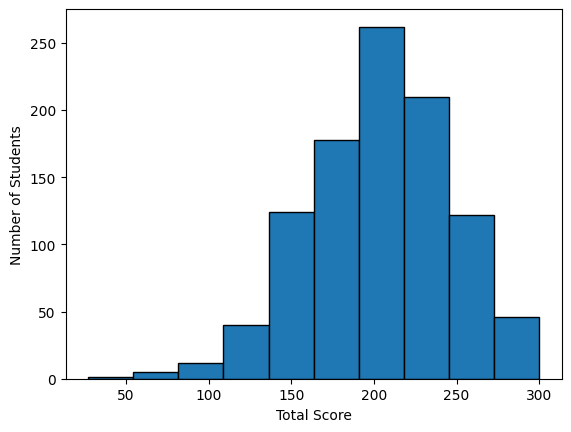

In [33]:
plt.hist(df['total score'], edgecolor='black')
plt.xlabel('Total Score')
plt.ylabel('Number of Students')

In [54]:
df['total score'].mode()

0    204
Name: total score, dtype: int64

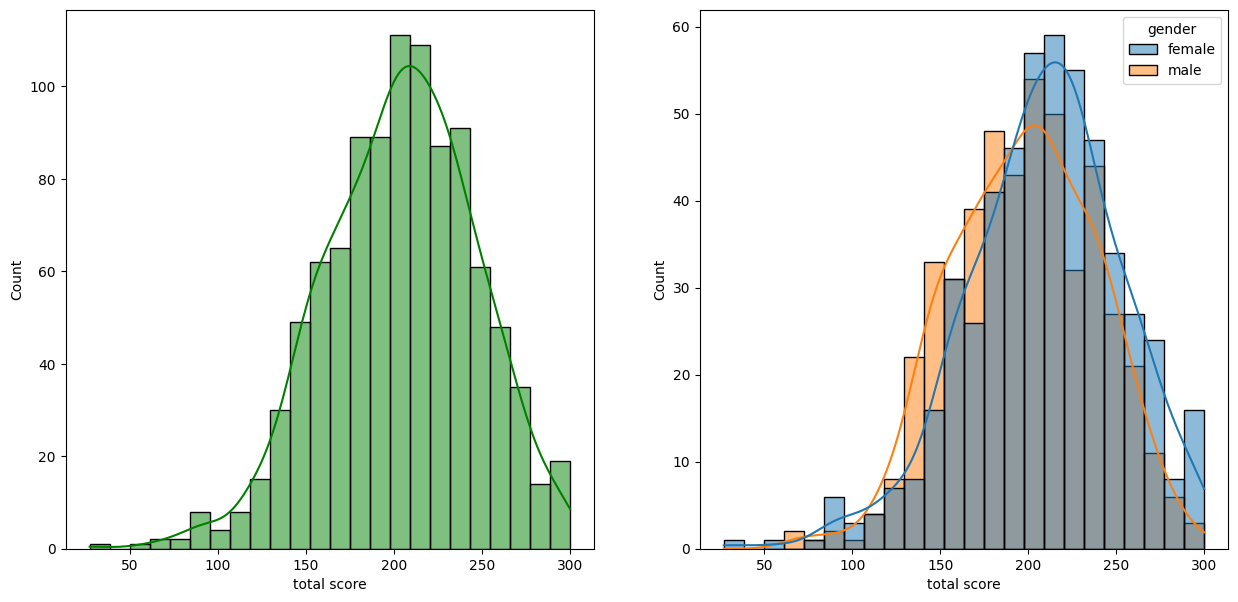

In [51]:
fix, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

1. Most of the students has total score around 200 which is almost same as mean score.
2. Normal distribution of total score
3. Strength female students getting mean score is stronger than male students.
4. Most Female students has total score of 225 and Most male students has total score of 200.
5. Hence. Female students has better total score than Male students.

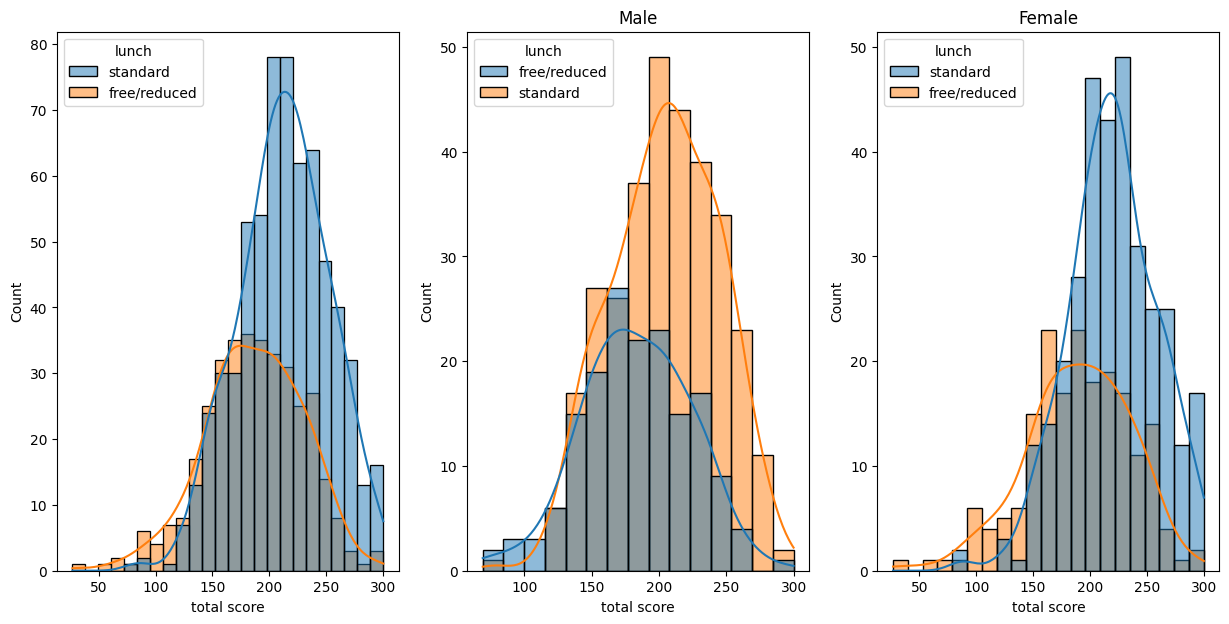

In [61]:
fix, ax = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='total score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='total score', kde=True, hue='lunch')
plt.title('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='total score', kde=True, hue='lunch')
plt.title('Female')
plt.show()

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

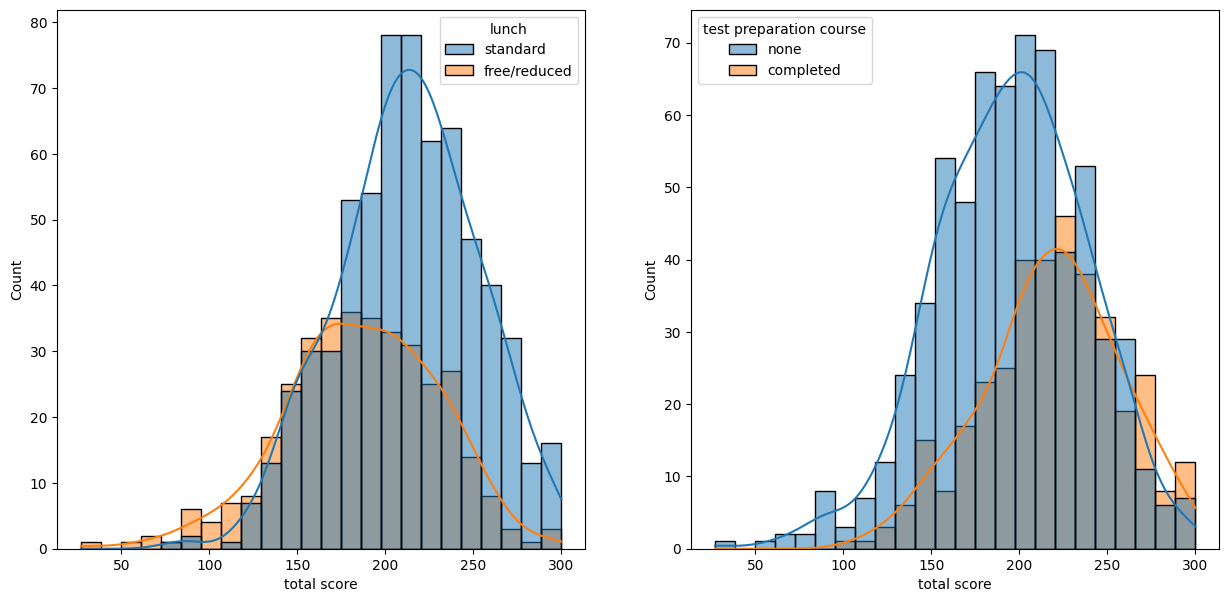

In [55]:
# total score w.r.t test preparation course and lunch
fix, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, hue='lunch')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='test preparation course')
plt.show()

- Most of the students have standard lunch than free one.
- Students with standard lunch are performing better than free ones



- Most of the students have taken test prep course
- Students that have taken test prep course are getting less score than those who have not taken course.

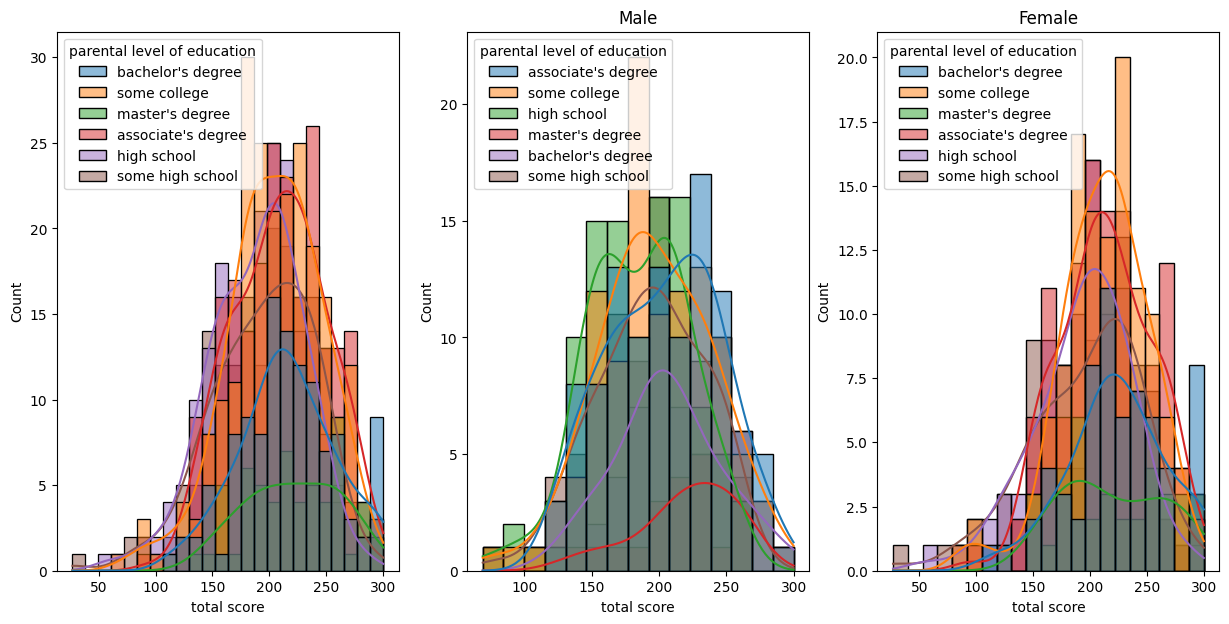

In [63]:
fix, ax = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='total score', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='total score', kde=True, hue='parental level of education')
plt.title('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='total score', kde=True, hue='parental level of education')
plt.title('Female')
plt.show()

- In general parental level of education deosn't help student to perform well in exams.
- In 2nd plot shows that parents whose masters degree is their male child tend to peform well in exam.
- In 3rd plot we see their is no effect of parental education on female students.

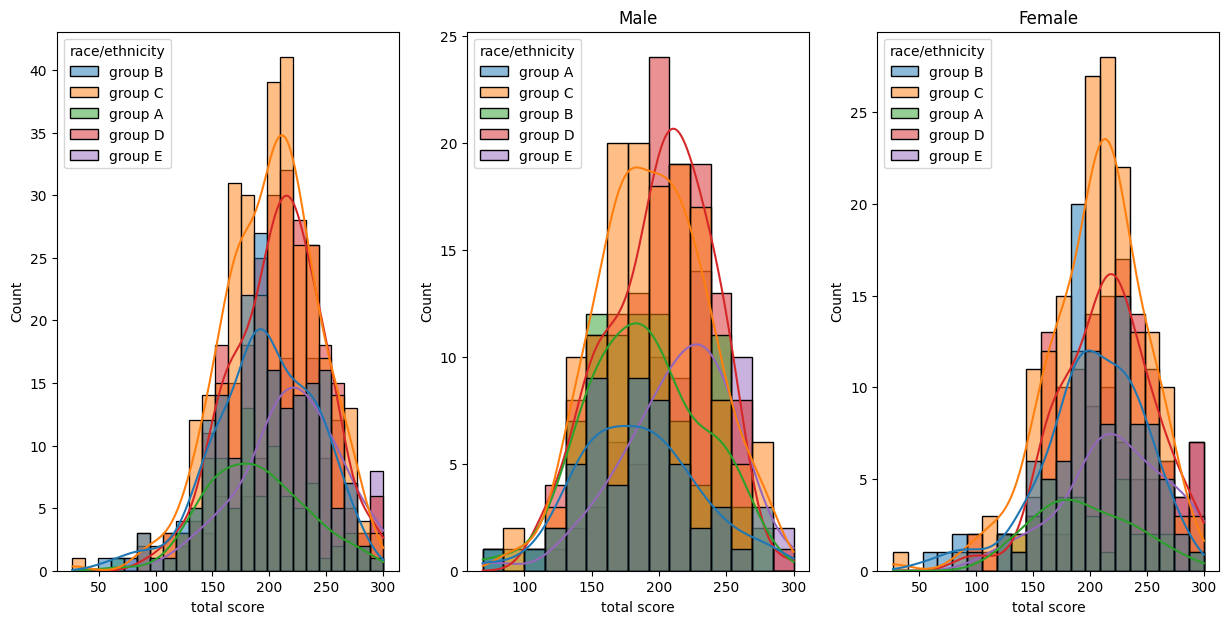

In [64]:
fix, ax = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='total score', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='total score', kde=True, hue='race/ethnicity')
plt.title('Male')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='total score', kde=True, hue='race/ethnicity')
plt.title('Female')
plt.show()

- group A and B peforms poorly in exams.
- group A and B peforms poorly irrespective of males or females.